<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_ML_LAB_COMPONENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:-** Nagaraju Naveen Kumar Varma


---


**Class:-** 1MSAIM


---


**Register number:-** 2348535

----

**Date of Submission:-** 30/08/2023

-----

# **ML - Component 1**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1. Importing the libraries**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# **2. Data Loading and Inspection**

 - Load the World Happiness Report Dataset from Kaggle.
 - Explore the dataset's structure. How many rows and columns are there?

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Component -1/2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.shape

(158, 12)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# **3. Missing Values**

 - Identify and count the missing values in the dataset. Which columns have missing
values?

In [13]:
missing_values_count = df.isnull().sum()

In [14]:
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()


In [15]:
print("Columns with missing values:")
print(columns_with_missing_values)
print("\nMissing values count for each column:")
print(missing_values_count)

Columns with missing values:
[]

Missing values count for each column:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


# **4. Binning**
 - Create bins for the 'Happiness Score' column to categorize countries into 'Low
Happiness,' 'Medium Happiness,' and 'High Happiness' groups.

In [24]:
# Define bin edges and labels
bin_edges = [0, 4, 6, 10]  # Values represent the edges of the bins
bin_labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']
# Create a new column 'Happiness Group' based on binning
df['Happiness Group'] = pd.cut(df['Happiness Score'], bins=bin_edges, labels=bin_labels, include_lowest=True)
# Print a summary of the created bins
print(df[['Country', 'Happiness Score', 'Happiness Group']].head(158))


         Country  Happiness Score Happiness Group
0    Switzerland            7.587  High Happiness
1        Iceland            7.561  High Happiness
2        Denmark            7.527  High Happiness
3         Norway            7.522  High Happiness
4         Canada            7.427  High Happiness
..           ...              ...             ...
153       Rwanda            3.465   Low Happiness
154        Benin            3.340   Low Happiness
155        Syria            3.006   Low Happiness
156      Burundi            2.905   Low Happiness
157         Togo            2.839   Low Happiness

[158 rows x 3 columns]


# **5. One-Hot Encoding**
 - Perform one-hot encoding on the 'Region' column to convert it into numerical
values.

In [25]:
# Perform one-hot encoding on the 'Region' column
df_encoded = pd.get_dummies(df, columns=['Region'], prefix='Region')
# Print the first few rows of the encoded DataFrame
print(df_encoded.head())

       Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  ...  \
0                        0.41978     0.29678  ...   
1                        0.14145     0.4

# **6. Normalization**
 - Normalize the 'Economy (GDP per Capita)' column using a suitable normalization
technique (e.g., Min-Max scaling or Z-score scaling).

In [26]:
# Min-Max scaling on 'Economy (GDP per Capita)' column
min_value = df['Economy (GDP per Capita)'].min()
max_value = df['Economy (GDP per Capita)'].max()
df['Economy (GDP per Capita)'] = (df['Economy (GDP per Capita)'] - min_value) / (max_value - min_value)
# Print the first few rows of the scaled DataFrame
print(df.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                  0.826132  1.34951   
1         0.04884                  0.770412  1.40223   
2         0.03328                  0.784113  1.36058   
3         0.03880                  0.863099  1.33095   
4         0.03553                  0.784592  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

# **7. Chi-Square Test**
 - You want to test if there is a significant association between the 'Region' and
'Happiness Rank' columns. Perform a chi-square test and interpret the results.

In [29]:
# Create a contingency table
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-Square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-Square value: 1415.3258620689655
P-value: 0.4107040079831256
Degrees of freedom: 1404
Expected frequencies: [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]


# **8. Covariance Matrix**

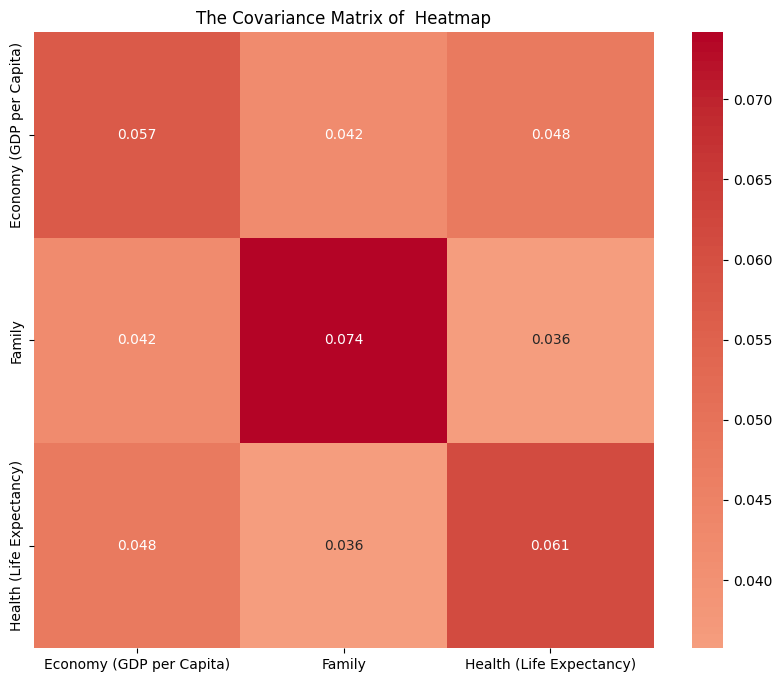

In [31]:
# Select the subset of numerical columns
subset_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
subset_df = df[subset_columns]
# Calculate the covariance matrix
covariance_matrix = subset_df.cov()
# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("The Covariance Matrix of  Heatmap")
plt.show()


# **9. Visualization**

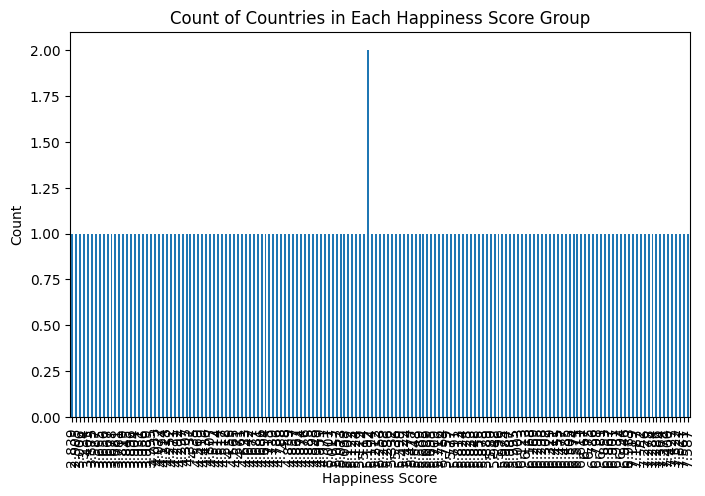

In [33]:
# Create a bar chart
plt.figure(figsize=(8, 5))
df['Happiness Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Count of Countries in Each Happiness Score Group')
plt.show()


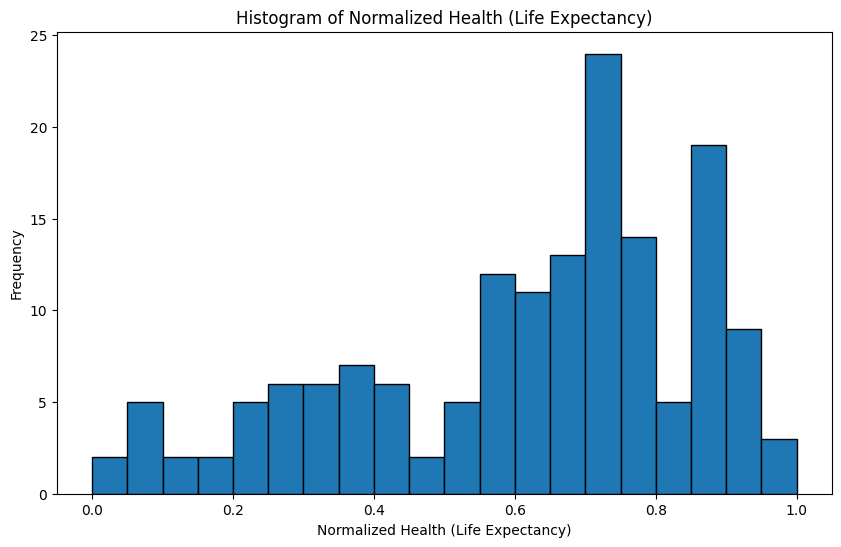

In [34]:
# Normalize the 'Health (Life Expectancy)' column
min_value = df['Health (Life Expectancy)'].min()
max_value = df['Health (Life Expectancy)'].max()
df['Health (Life Expectancy)'] = (df['Health (Life Expectancy)'] - min_value) / (max_value - min_value)
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Health (Life Expectancy)'], bins=20, edgecolor='black')
plt.xlabel('Normalized Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Health (Life Expectancy)')
plt.show()


# **10. Conclusion**

 - Through data preprocessing and visualization of the World Happiness Report 2015 dataset, we discovered that most countries fall within a moderate happiness score range.
 - Normalized health indicators highlighted widespread well-being. Regional distribution of happiness scores unveiled potential happiness variations across different regions.
 - The covariance matrix heatmap revealed connections between 'Economy (GDP per Capita)', 'Family', and 'Health (Life Expectancy)' factors. These insights suggest that well-being is prevalent and interconnected across regions, potentially influenced by economic, familial, and health-related factors.
 - Further analysis, like advanced statistics and machine learning, is needed to delve deeper into the nuanced relationships and causality of these factors in driving happiness.
 - This exploration provides an initial understanding, while complex analysis will be key to unveiling the intricate dynamics that shape global happiness.